# Import Library

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Distance Calculate Function

In [2]:
def EuclidianDistance (pointA,PointB):
    distance= 0.0
    for i in range(len(pointA)):
        distance += (pointA[i] - PointB[i])**2
    distance = math.sqrt(distance)
    return distance

# K-Means Algorithm Function

In [3]:
def Kmeans(DataSetPoint,NumberCluster,MaxIterations = 100):
    #Find Dimension Data set
    Dimension = len(DataSetPoint[0])     
    cluster = [0] * len(DataSetPoint)
    prev_cluster = [-1] * len(DataSetPoint)
    i = 0
    #Find Cluster Centers Randomly
    cluster_centers = []
    for i in range(NumberCluster):
        new_cluster = []
        cluster_centers += [random.choice(DataSetPoint)]
        force_recalculation = False
    #Extract Number Cluster
    while (cluster != prev_cluster) or (i > MaxIterations) or (force_recalculation) : 
        prev_cluster = list(cluster)
        force_recalculation = False
        i += 1
        for p in range(0,len(DataSetPoint)):
            min_dist = float("inf")
            for c in range(0,len(cluster_centers)):
                dist = EuclidianDistance(DataSetPoint[p],cluster_centers[c])
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c   
        for NumberCluster in range(0,len(cluster_centers)):
            new_center = [0] * Dimension
            members = 0
            for p in range(0,len(DataSetPoint)):
                if (cluster[p] == NumberCluster): #If this point belongs to the cluster
                    for j in range(0,Dimension):
                        new_center[j] += DataSetPoint[p][j]
                    members += 1          
            for j in range(0,Dimension):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                else: 
                    new_center = random.choice(DataSetPoint)
                    force_recalculation = True
                    print ("Forced Recalculation...")
            cluster_centers[NumberCluster] = new_center
    return cluster_centers,cluster,i
    

# Visualization Function

In [4]:
def Visualization(Center,DataSetPoint,Cluster,numbercluster):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(' Scatter Plot on 100 Random Number ')
    ax1.scatter(sample_set[:,0], sample_set[:,1],25,c='b')
    ax1.set_title(" Sample Data  ")
    CX,CY = [],[]
    for i in range(len (Center)):
        CX.append(Center[i][0])
        CY.append(Center[i][1])
    plt.scatter(sample_set[:,0],sample_set[:,1] , c='#050505', s=7)
    plt.scatter(CX, CY, marker='*', s=200, c='g')
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(numbercluster):
            points = np.array([sample_set[j] for j in range(len(sample_set)) if cluster[j] == i])
            ax2.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax2.scatter(CX, CY, marker='*', s=200, c='#050505')
    ax2.set_title(" Kmeans Scatter Plot ")

# Test Function

============== Results ==============
Center Points of Clusters :  [[5.0920742803130725, 3.9338843045532457], [1.7233029243975133, 7.802160011880447], [8.62601445106976, 2.1503110389569526], [7.030434930867759, 7.95203193740193], [1.5856122243432276, 2.094688605329623]]
Number Iterations :  12
Cluster Labels :  [3, 0, 0, 3, 1, 3, 2, 3, 1, 1, 4, 0, 2, 1, 1, 4, 4, 1, 0, 4, 0, 2, 1, 0, 1, 0, 4, 1, 0, 4, 3, 3, 0, 2, 1, 1, 3, 1, 0, 0, 0, 2, 0, 4, 1, 0, 4, 4, 3, 0, 0, 0, 4, 0, 4, 0, 3, 1, 3, 0, 1, 4, 3, 1, 1, 4, 4, 1, 2, 4, 1, 3, 3, 3, 0, 4, 0, 2, 1, 3, 1, 4, 1, 2, 1, 4, 1, 2, 0, 1, 1, 0, 1, 4, 2, 2, 3, 1, 0, 0]


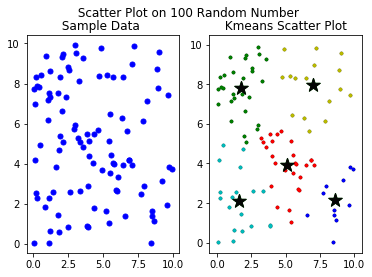

In [5]:
#Prepare Data and Visualize on Scatter Plot
sample_set=np.random.rand(100, 2)*10
numbercluster=5
Center , cluster, iteration = Kmeans(sample_set,numbercluster)

print ("============== Results ==============")
print ("Center Points of Clusters : ", Center)
print ("====================================")
print ("Number Iterations : ",iteration)
print ("====================================")
print ("Cluster Labels : ", cluster)
print ("====================================")

Visualization(Center,sample_set,cluster,numbercluster)